<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/AICE_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as grb
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

import pickle
import joblib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split : 테스트 데이터 20%
train_x, test_x, train_y, test_y = train_test_split(
    df_feature, df_target, test_size=0.20, random_state=42)

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm

results = sm.OLS(train_y, train_x).fit()
results.summary()

# 머신러닝

## LinearRegression

In [ ]:
# 기계학습에서 LinearRegression
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

model=lr()
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

print("모델의 회귀계수는 : ", model.coef_, "이고 모델의 절편은 : ",model.intercept_)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

## Ensemble

- 여러 개의 결정 트리(Decision Tree)를 결합하여 하나의 결정 트리보다 더 좋은 성능을 내는 머신러닝 기법
- 앙상블 학습법에는 배깅(Bagging), 부스팅(Boosting), 스태킹(Staking) 등이 존재

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=rfr(n_estimators=100,max_depth=5,min_samples_split=30,min_samples_leaf=15)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

rf_importances_values = model.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = train_x.columns)
rf_top10 = rf_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=rf_top10, y=rf_top10.index,palette = "RdBu")
plt.show()

### GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as grb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=grb(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=30,min_samples_leaf=15)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

### XGBoost

In [ ]:
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=xgb(n_estimators=100,gamma=1,eta=0.1,max_depth=5,reg_lambda=5,reg_alpha=5)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

### 한 번에 확인

In [ ]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as grb
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

import pickle
import joblib
import time

model_list=[
            lr(),
            rfr(),
            grb(),
            xgb()
            ]

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model_rslt = []
for i in range(len(model_list)):
    start_time = time.process_time()
    model = model_list[i]
    model.fit(train_x, train_y)
    end_time = time.process_time()
    joblib.dump(model, '{}_model.pkl'.format(i)) # 모델 저장, sklearn을 통해서 만들어진 모델은 pkl 파일로 저장
    print(f"* {model} 결과 시작")
    print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))
    pred_y = model.predict(test_x)
    model_rslt.append(model)
    print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
    print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))
    print("---------------------------------------------------------------------------")

## confusion matrix

In [ ]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc_pred = dtc.predict(val_x)
dtc.score(train_x, train_y), dtc.score(val_x, val_y)

In [ ]:
# Confusion Matrix 확인
confusion = confusion_matrix(val_y, dtc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [ ]:
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=Train_Data.columns[:-1],
        width = dtc.feature_importances_)
plt.show()

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(train_x,train_y)
abc_pred = abc.predict(val_x)
abc.score(train_x, train_y), abc.score(val_x, val_y)

# 딥러닝

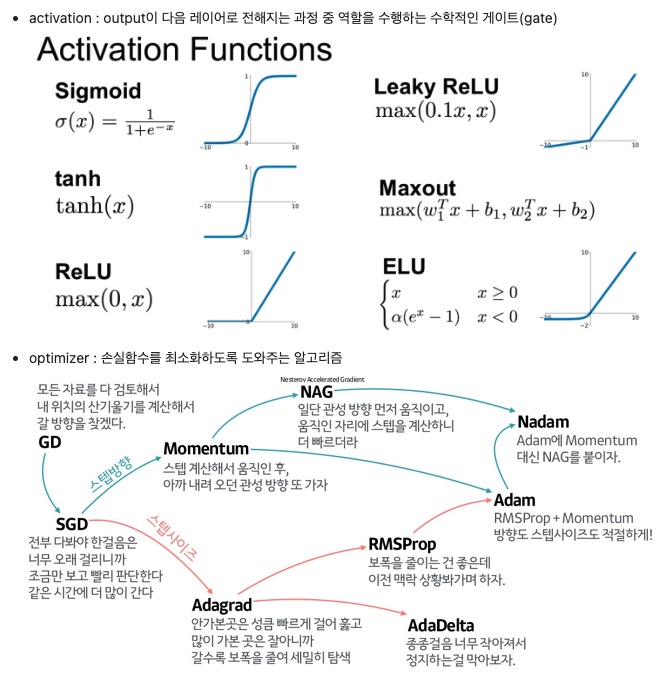

만약에 분류문제를 해결해야 한다면!(아래 내용은 일반적으로 선호되는 내용이지 절대적이라고 하지는 않습니다.)
1. `activation`설정
  * 마지막 출력층에 Label의 열이 하나고 두 개의 값으로 이루어진 이진분류라면 `sigmoid`
  * Label의 열이 두개 이상이라면 `softmax`
2. `loss`설정
  * 출력층 activation이 `sigmoid` 인 경우: `binary_crossentropy`
  * 출력층 activation이 `softmax` 인 경우:
    * 원핫인코딩(O): `categorical_crossentropy`
    * 원핫인코딩(X): `sparse_categorical_crossentropy`
3. `metrics`를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있습니다.

In [ ]:
# 모델 만들기 : 아주 간단한 모델
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_x.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)])

    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae', 'mse'])
    return model

In [ ]:
model = build_model()
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=10) # 조기종료 콜백함수 정의

checkpoint_path = 'tmp_checkpoint.ckpt'
cb_checkpoint = ModelCheckpoint(checkpoint_path,
                                save_weights_only=True,
                                monitor='val_loss',
                                verbose=1,
                                save_best_only=True) # 체크포인트 저장

history = model.fit(train_x, train_y, epochs=30,
                    validation_data = (test_x,test_y),
                    callbacks=[cb_checkpoint, early_stopping])

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# 최적 모델 불러오기 및 저장
model.load_weights(checkpoint_path)
model.save("DeeplearningModel.h5")

# 모델 평가

In [ ]:
# 모델을 담을 빈 리스트 생성
model_rslt = []

# 앞서 저장한 머신러닝 모델 불러오기 및 저장
for i in range(4):
    model_rslt.append(joblib.load(f"{i}_model.pkl"))

# 앞서 저장한 딥러닝 모델 불러오기 및 저장
model_rslt.append(keras.models.load_model("DeeplearningModel.h5"))

In [ ]:
e1_list = ['ETA1', 'ETA2', 'ETA3', 'ETA4', 'ETA5']
e2_list = ['ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5']

for e1, e2, model in zip(e1_list, e2_list, model_rslt):
    df_evaluation[e1] = model.predict(df_evaluation_feature)
    df_evaluation.loc[(df_evaluation[e1] < 0), e1] = 0
    etaa = (1-(abs(df_evaluation['ET']-df_evaluation[e1])/df_evaluation['ET']))*100.0
    df_evaluation[e2] = etaa
    df_evaluation.loc[(df_evaluation[e2] < 0), e2] = 0

# mean, min, max, std
etaa = ['ETAA', 'ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5']
alg = ['DATA', 'ML-LG', 'ML-RFR', 'ML-GBR', 'XBR', 'Deep']

print('+-------------------------------------------------------+')
print('|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |')
print('+----------+---------+-----------+----------+-----------+')
for i, e in zip(range(len(alg)), etaa):
    eMean = df_evaluation[e].mean()
    eStd = df_evaluation[e].std()
    eMin = df_evaluation[e].min()
    eMax = df_evaluation[e].max()
    print('|  {:6s}  |   {:3.1f}  |   {:05.1f}   |   {:4.1f}   |  {:7.1f}  | '.format(alg[i], eMean, eStd, eMin, eMax))
print('+----------+---------+-----------+----------+-----------+\n\n')

In [ ]:
plt.figure(figsize=(100, 10))
idx = np.arange(0, 100)
plt.plot(idx, df_evaluation.ET[0:100], 'b', marker='s')
plt.plot(idx, df_evaluation.ETA1[0:100], 'g', marker='s')
plt.plot(idx, df_evaluation.ETA2[0:100], 'r', marker='+')
plt.plot(idx, df_evaluation.ETA3[0:100], 'y', marker='*')
plt.plot(idx, df_evaluation.ETA4[0:100], 'b', marker='o')
plt.plot(idx, df_evaluation.ETA5[0:100], 'b', marker='^')
plt.plot()
plt.xlabel('Index')
plt.ylabel('ET(sec)')
plt.legend(['Real', 'ML-LG', 'ML-RFR', 'ML-GBR', 'XBR', 'Deep'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]


#acc를 구해서 시각화해줌
def acc_eval(name_, pred, actual):
    global predictions
    global colors

    acc = (pred==actual).mean()
    my_predictions[name_] = acc

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=False)  # 정확도 내림차순으로 sort

    df = pd.DataFrame(y_value, columns=['model', 'acc'])
    #print(df)
    min_ = df['acc'].min() -0.5
    max_ = 1.2

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['acc'])

    for i, v in enumerate(df['acc']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v+0.1, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('Accuracy', fontsize=18)
    plt.xlim(min_,max_)

    plt.show()

#실수로 잘못 넣은 경우 해당 모델을 삭제
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

#출처: 패스트캠퍼스-직장인을위한 파이썬 데이터분석(이경록) 발췌

# 모델 최적화 : Hyperparameter Tuning

## Panda전략 : Babysitting one model

In [ ]:
# 1단계 n-estimators와 learning_rate(eta)를 먼저 지정 : eta 0.1 => R-squared Score on Test set : 0.71631
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

model=xgb(n_estimators=100, eta=0.1)
# model=xgb(n_estimators=100, eta=0.2)
# model=xgb(n_estimators=100, eta=0.3)
# model=xgb(n_estimators=100, eta=0.2, max_depth=5, subsample= 0.8, colsample_bytree=0.5, reg_alpha=3, gamma=5)
# model=xgb(n_estimators=200, eta=0.1, max_depth=5, subsample= 0.8, colsample_bytree=0.5, reg_alpha=3, gamma=5)

model.fit(train_x, train_y)
pred_y = model.predict(test_x)

print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 모델을 저장합니다.
import pickle
import joblib

joblib.dump(model, '4_model.pkl')

## Caviar전략 : Training many models in parallel

In [ ]:
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import time

params = { 'n_estimators' : [50, 100, 200],
           'learning_rate' : [0, 0.01],
           'max_depth' : [0, 3], }

xgb_model = xgb(random_state = 0, n_jobs = 1)
grid_cv = GridSearchCV(xgb_model, param_grid = params, cv = 3, n_jobs = 1)
start_time = time.process_time()
grid_cv.fit(train_x, train_y)
end_time = time.process_time()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [ {'n_estimators':[30,40,50,60,100],
                'max_depth':[30,40,50,60,100]} ]

rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid, cv=2,
                        n_jobs=-1, verbose=1 # Log 출력 Level 조정
                        scoring='accuracy') # Classification일때  'accuracy','f1' ...
                                            # Regression 일때 'neg_mean_squared_error','r2'...
rfc_grid.fit(train_x, train_y)

print('최적의 파라미터 값 : ', rfc_grid.best_params_)
print('최고의 점수 : ', rfc_grid.best_score_)

rfc_model = rfc_grid.best_estimator_
rfc_grid_pred = rfc_model.predict(val_x)

# train 및 val 데이터 정확도
rfc_model.score(train_x, train_y), rfc_model.score(val_x, val_y)

## RandomForest

In [ ]:
# 아래에 실습코드를 작성하세요.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [ {'n_estimators':[30,40,50,60,100],
                'max_depth':[30,40,50,60,100]} ]

rfc = RandomForestRegressor()
rfc_grid = GridSearchCV(rfc, param_grid=param_grid, cv=2,
                        n_jobs=-1, verbose=1) # Log 출력 Level 조정
                        # scoring='neg_mean_squared_error')
rfc_grid.fit(train_x, train_y)

print('최적의 파라미터 값 : ', rfc_grid.best_params_)
print('최고의 점수 : ', rfc_grid.best_score_)

rfc_model = rfc_grid.best_estimator_
rfc_grid_pred = rfc_model.predict(val_x)

import pickle
import joblib

joblib.dump(rfc_model, 'model/6_model.pkl')

## Tensorflow

In [ ]:
# 아래에 실습코드를 작성하세요.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 만들기 : 아주 간단한 모델
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_x.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)])

    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae', 'mse'])
    return model

model = build_model()
tf.keras.utils.plot_model(model, show_shapes=True)

# 모델 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=10) # 조기종료 콜백함수 정의

checkpoint_path = 'tmp_checkpoint.ckpt'
cb_checkpoint = ModelCheckpoint(checkpoint_path,
                                save_weights_only=True,
                                monitor='val_loss',
                                verbose=1,
                                save_best_only=True) # 체크포인트 저장

history = model.fit(train_x, train_y, epochs=30,
                    validation_data = (test_x,test_y),
                    callbacks=[cb_checkpoint, early_stopping])

# 최적 모델 불러오기 및 저장
model.load_weights(checkpoint_path)
model.save("model/DeeplearningModel_2.h5")